In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
import dask.array as da
from dask.diagnostics import ProgressBar
import h5py

/usr/lib64/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
fs = 100e3 # sampling rate
fc = 64e3 # chip rate

In [3]:
PRN_LEN = 511

mseq1 = np.array([
      1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,1,1,1,0,0,1,0,
      1,1,1,0,1,1,1,0,0,0,0,0,0,1,1,1,0,0,1,1,1,0,1,0,0,1,0,0,1,1,1,1,
      0,1,0,1,1,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,1,1,0,0,0,0,
      1,0,1,1,1,1,0,1,1,0,1,1,0,0,1,1,0,1,0,0,0,0,1,1,1,0,1,1,1,1,0,0,
      0,0,1,1,1,1,1,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,1,1,1,0,0,0,1,0,1,
      1,1,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,1,0,0,
      0,1,1,1,1,0,0,1,1,1,1,1,0,0,1,1,0,1,1,0,0,0,1,0,1,0,1,0,0,1,0,0,
      0,1,1,1,0,0,0,1,1,0,1,1,0,1,0,1,0,1,1,1,0,0,0,1,0,0,1,1,0,0,0,1,
      0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,1,1,
      1,0,0,1,0,1,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,1,0,1,0,0,1,1,0,1,1,1,
      0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,1,0,0,1,1,1,1,1,1,0,1,1,
      0,0,1,0,0,1,0,0,1,0,1,1,0,1,1,1,1,1,1,0,0,1,0,0,1,1,0,1,0,1,0,0,
      1,1,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,1,0,0,0,1,1,0,1,
      0,0,1,0,1,1,1,1,1,1,1,0,1,0,0,0,1,0,1,1,0,0,0,1,1,1,0,1,0,1,1,0,
      0,1,0,1,1,0,0,1,1,1,1,0,0,0,1,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,
      0,1,0,1,1,0,1,1,0,1,1,1,0,1,1,0,0,0,0,0,1,0,1,1,0,1,0,1,1,1,1], dtype = 'uint8')
    
mseq2 = np.array([
      1,0,1,0,1,0,1,0,1,1,1,1,0,1,1,1,1,1,1,0,0,1,1,1,1,0,1,0,0,1,0,0,
      1,1,1,1,1,0,0,1,0,1,1,1,1,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,
      1,1,0,0,1,1,1,0,1,1,1,1,0,1,0,1,1,0,1,1,0,1,1,1,0,1,0,1,0,1,1,0,
      1,0,0,1,0,1,1,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,1,1,1,
      0,1,1,0,0,0,0,1,0,0,0,1,1,1,1,1,1,1,1,1,0,0,0,1,1,0,0,0,0,0,1,0,
      1,0,0,0,1,1,1,0,1,1,0,1,0,0,0,0,1,0,1,1,1,0,0,0,0,1,1,1,0,0,0,0,
      0,1,1,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,1,1,0,0,0,1,1,1,1,0,1,1,0,1,
      1,0,0,1,1,1,1,1,1,0,1,1,1,0,1,1,1,0,0,1,1,1,0,0,1,1,0,0,0,0,1,1,
      0,0,0,1,0,1,1,1,1,0,0,1,1,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,
      0,0,1,0,1,0,0,0,0,1,1,1,1,0,0,1,0,0,1,1,0,1,1,1,0,0,0,1,1,1,0,0,
      1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,1,0,1,0,1,1,1,1,1,1,1,0,1,0,1,
      0,0,1,0,0,0,1,1,0,1,1,0,1,0,1,0,0,0,0,0,1,1,0,0,1,1,0,0,1,0,1,0,
      0,1,0,1,0,1,0,0,0,1,0,1,0,0,1,1,1,0,0,0,1,0,1,0,1,1,1,0,0,1,0,1,
      0,1,1,0,0,0,0,0,0,0,1,1,0,1,1,1,1,0,0,0,1,0,0,0,1,0,1,1,0,1,0,1,
      1,0,0,1,0,0,1,0,0,1,0,1,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,0,0,1,1,1,
      1,0,0,0,0,0,0,1,1,1,1,1,0,1,1,0,0,1,0,1,1,0,1,1,1,1,1,0,0,0,0], dtype = 'uint8')

def prn(i):
    if 0 <= i and i < PRN_LEN:
        return mseq1 ^ np.roll(mseq2, -i)
    if i == -1:
        return mseq1
    if i == -2:
        return mseq2
    raise ValueError

def modulated_prn(i):
    phases = 1j**(np.concatenate(([0], -np.cumsum(2*prn(i).astype('int')-1) % 4)))
    oqpsk_symbols = phases[:-1] + phases[1:]
    return oqpsk_symbols[np.int32(np.arange(0, oqpsk_symbols.size, fc/fs))]

In [4]:
N_FFT = 2048

prns_fft = np.empty((PRN_LEN + 2, N_FFT), dtype = 'complex64')
for i in range(PRN_LEN):
    prns_fft[i,:] = np.fft.fft(modulated_prn(i), N_FFT).conjugate()
prns_fft[PRN_LEN, :] = np.fft.fft(modulated_prn(-1), N_FFT).conjugate()
prns_fft[PRN_LEN+1, :] = np.fft.fft(modulated_prn(-2), N_FFT).conjugate()

In [5]:
max_doppler = 2e3
centre_doppler = 10500
doppler_per_bin = fs/N_FFT
max_doppler_bin = int(np.ceil(max_doppler/doppler_per_bin))
centre_doppler_bin = round(centre_doppler/doppler_per_bin)
doppler_bins = np.arange(-max_doppler_bin, max_doppler_bin+1) + centre_doppler_bin
N_RESULTS = 3

def do_correlations(x):
    corr = np.empty((prns_fft.shape[0], doppler_bins.size, N_FFT//2), dtype = 'float32')
    results = np.empty((prns_fft.shape[0], N_RESULTS), dtype = 'float32') # maximum_correlation, doppler_bin, delay
    
    y_f = np.fft.fft(x).astype('complex64')
    
    for i, doppler in enumerate(doppler_bins):
        corr[:,i,:] = np.abs(np.fft.ifft(np.roll(y_f, -doppler).reshape((1,-1)) * prns_fft)[:,:N_FFT//2])
    
    best_doppler, best_delay = np.unravel_index(np.argmax(corr.reshape((corr.shape[0],-1)), axis = 1), corr.shape[1:])
    
    results[:,0] = corr[np.arange(corr.shape[0]), best_doppler, best_delay]
    results[:,1] = doppler_bins[best_doppler] * doppler_per_bin
    results[:,2] = best_delay
    del corr, best_doppler, best_delay
    
    return results

In [6]:
def process_block(b):
    step = N_FFT//2
    n_cells = b.size//step - 2
    results = np.empty((n_cells, prns_fft.shape[0], N_RESULTS), dtype='float32')
    for cell in range(n_cells):
        results[cell,...] = do_correlations(b[(cell+1)*step:(cell+1)*step+N_FFT])
    return results

def process_da(x):
    return da.map_overlap(x, process_block, depth = N_FFT//2, boundary = 0, trim = False,\
                         dtype = 'float32', chunks = (x.chunksize[0]//(N_FFT//2), prns_fft.shape[0], N_RESULTS), new_axis = (1,2))

In [7]:
x = np.memmap('/home/daniel/Descargas/sprites.c64', mode='r', dtype='complex64')
chunksize = N_FFT * 8
x_da = da.from_array(x[:x.size//chunksize*chunksize], chunks = chunksize)
x_da

dask.array<array, shape=(68386816,), dtype=complex64, chunksize=(16384,)>

This took 57hr 49min 11.6s to run on my i7-2620M.

In [8]:
#with ProgressBar():
#    process_da(x_da).to_hdf5('sprites.hdf5', '/sprites_correlations')

The correlation data is a three-dimensional array. The first dimension represents time, in windows of `FFT_SIZE//2` samples, the second dimension represents PRN (PRNs 0 to 510 are Gold codes, while PRNs 511 and 512 are the M-sequences), and the third dimension represents different variables: (correlation magnitude, doppler frequency, correlation offset in samples within the `FFT_SIZE//2` window).

In [9]:
data = h5py.File('sprites.hdf5')['sprites_correlations']
data

<HDF5 dataset "sprites_correlations": shape (66784, 513, 3), type "<f4">

First we try to detect which PRNs are present. This is not so straightforward, because there are strong signals from some PRNs and the coding gain of spread spectrum is only 27dB at best, so during strong transmissions, all PRNs correlate due to nonzero cross-correlation.

We do the following heuristic. For each given time, we consider a certain percentile of the correlation magnitudes of all PRNs for that time. We call this percentile the `crosscorrelation_threshold`. We only consider correlations which are above the `crosscorrelation_threshold`.

In [10]:
crosscorrelation_threshold = np.percentile(data[:,:,0], 90, axis = 1)

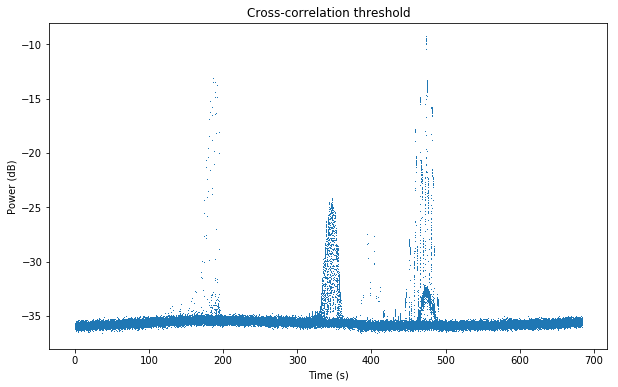

In [11]:
plt.figure(figsize = (10,6), facecolor='w')
time = np.arange(data.shape[0])*N_FFT//2/fs
plt.plot(time, 20*np.log10(crosscorrelation_threshold), ',')
plt.title('Cross-correlation threshold')
plt.xlabel('Time (s)')
plt.ylabel('Power (dB)');

With the goal of detecting which PRNs are present in the recording, we now compute the largest correlation for each PRN, weighted against the cross-correlation threshold. We only consider as detected the best 10 PRNs according to this metric. The remaining PRNs have all very small correlations.

In [12]:
largest_correlation_per_prn = np.max(data[:,:,0]/crosscorrelation_threshold.reshape((-1,1)), axis = 0)

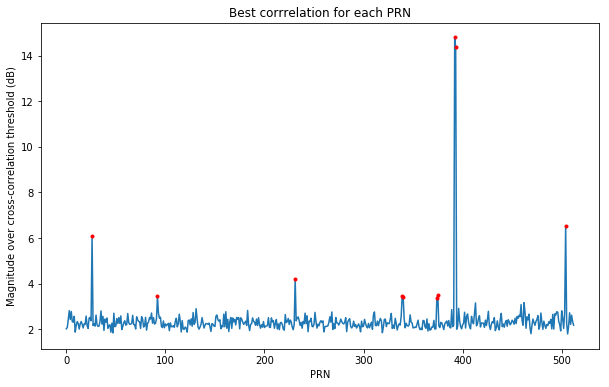

In [13]:
plt.figure(figsize = (10,6), facecolor='w')
best = np.argsort(-largest_correlation_per_prn)[:10]
plt.plot(20*np.log10(largest_correlation_per_prn))
plt.plot(best, 20*np.log10(largest_correlation_per_prn[best]), 'r.')
plt.title('Best corrrelation for each PRN')
plt.xlabel('PRN')
plt.ylabel('Magnitude over cross-correlation threshold (dB)');

In [14]:
def spectrum_plot(ax, x, skip):
    f, t, Sxx = scipy.signal.spectrogram(x, fs, return_onesided=False)
    f = np.fft.fftshift(f)
    t += skip
    ax.imshow(np.fft.fftshift(np.log10(Sxx), axes=0)[::-1,:], extent = [t[0],t[-1],f[0],f[-1]], aspect='auto', cmap='viridis')
    ax.set_ylabel('Frequency (Hz)')

Some of these detections are false detections. To filter out false detections, we plot the spectrum of the recording of the best correlation (weighted with cross-correlation threshold) for each PRN. The segment where the PRN was correlated is shown between red lines. We also plot the signal and the correlation power in dB.

This shows that some of the detections are false detections, since no signal was visible in the spectrum when the correlation happened. "Local" SNRs for valid detections are around 15dB, while some false detections have a local SNR of only 2dB.

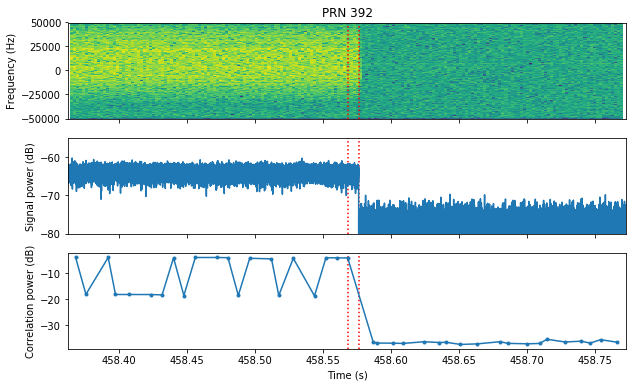

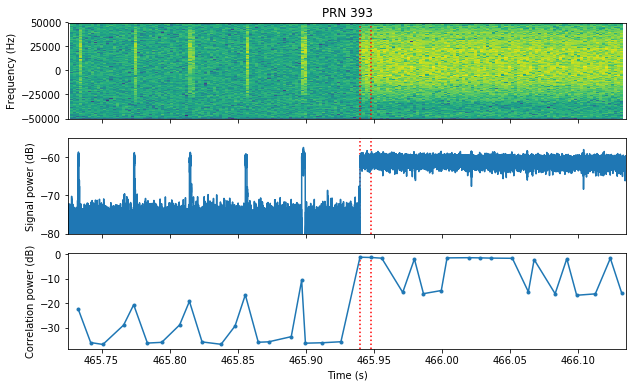

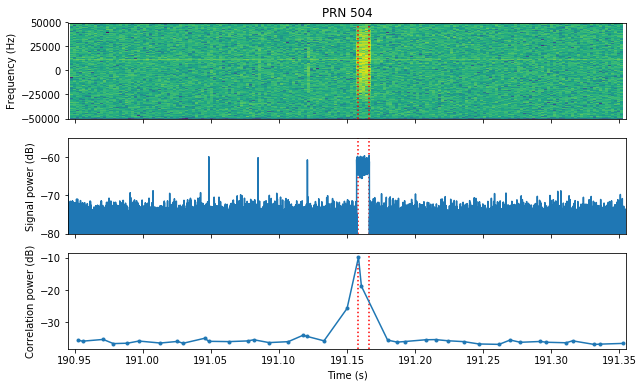

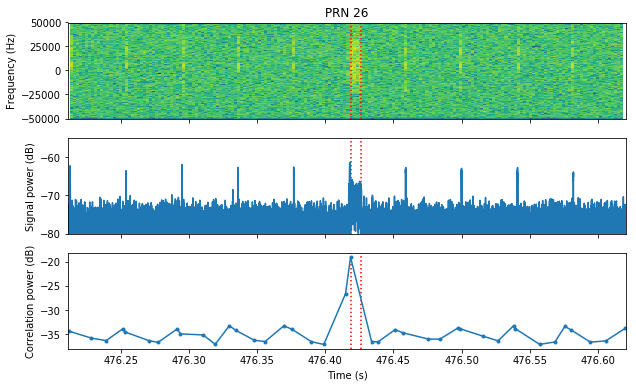

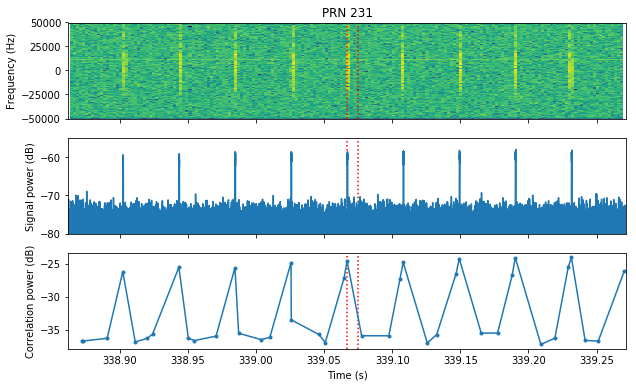

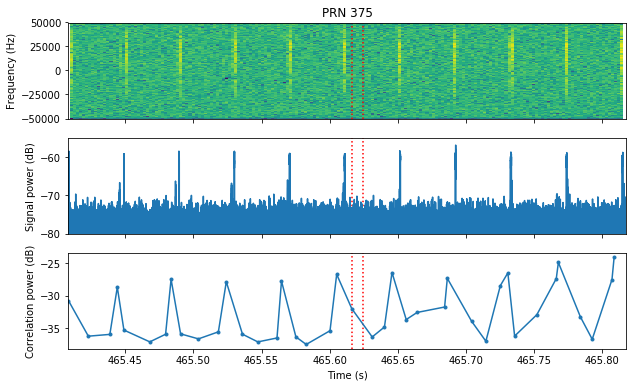

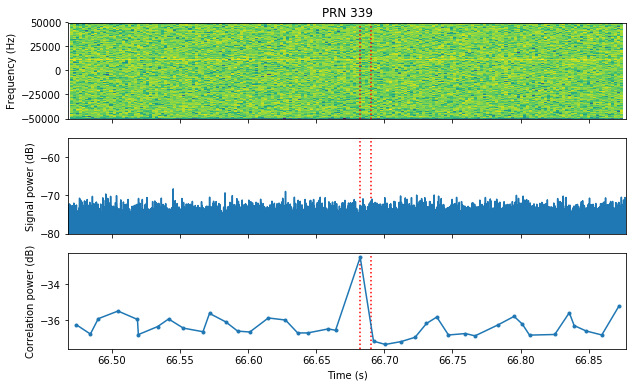

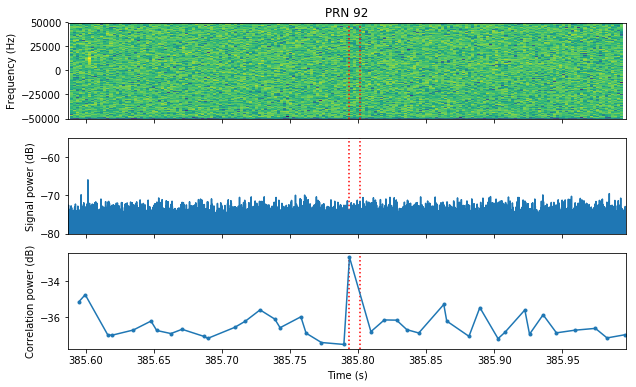

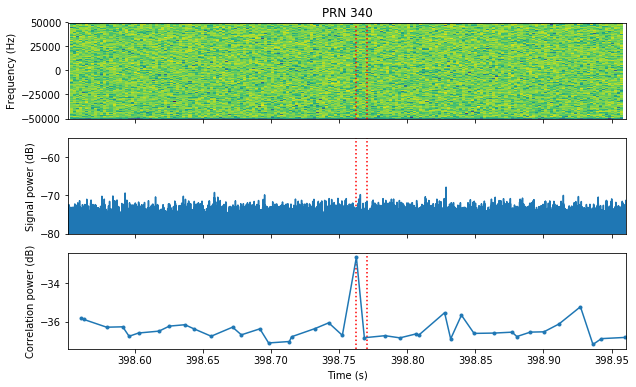

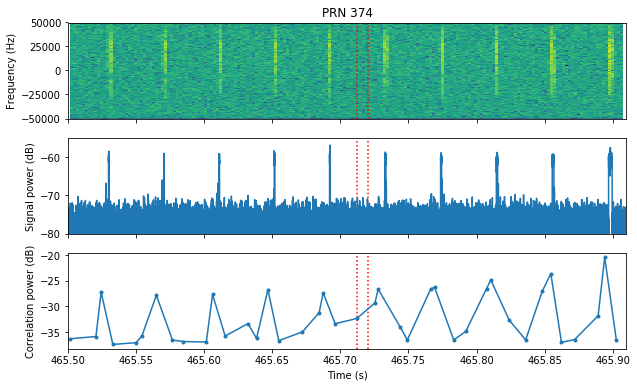

In [15]:
for b in best:
    fig, axs = plt.subplots(3, sharex = True, figsize = (10, 6), facecolor = 'w')
    best_pos = np.argmax(data[:,b,0]/crosscorrelation_threshold)
    skip = best_pos * N_FFT//2
    backwards = 10
    start = skip - backwards * N_FFT
    segment_len = 20
    segment = x[start:start+segment_len*N_FFT]
    spectrum_plot(axs[0], segment, start / fs)
    for ax in axs:
        ax.axvline(x = (skip + data[best_pos,b,2])/fs, color = 'red', linestyle = ':')
        ax.axvline(x = (skip + data[best_pos,b,2])/fs + PRN_LEN/fc, color = 'red', linestyle = ':')
        ax.set_xlim((start/fs, (start+segment_len*N_FFT)/fs))
    axs[1].plot(start/fs + np.arange(segment.size)/fs, 20*np.log10(np.abs(segment)))
    axs[1].set_ylim((-80,-55))
    axs[2].plot(start/fs + np.arange(segment_len * 2)*N_FFT//2/fs + \
                data[best_pos-backwards*2:best_pos+(segment_len-backwards)*2, b, 2]/fs, \
                20*np.log10(data[best_pos-backwards*2:best_pos+(segment_len-backwards)*2, b, 0]), '.-')
    axs[2].set_xlabel('Time (s)')
    axs[0].set_title(f'PRN {b}')
    axs[1].set_ylabel('Signal power (dB)')
    axs[2].set_ylabel('Correlation power (dB)')

We only accept as valid the first 5 candidate PRNs.

In [16]:
accepted = best[:5]
accepted

array([392, 393, 504,  26, 231])

In [17]:
best_prn = np.argmax(data[:,:,0], axis = 1)

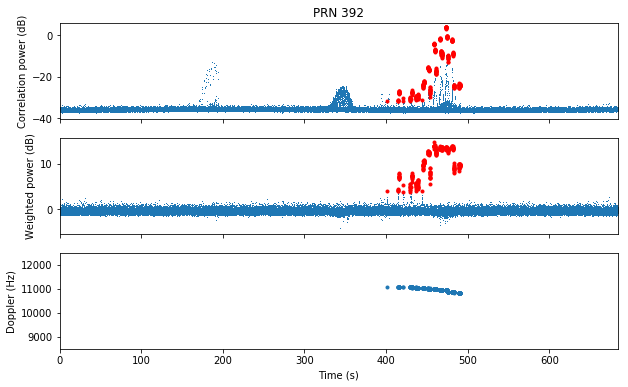

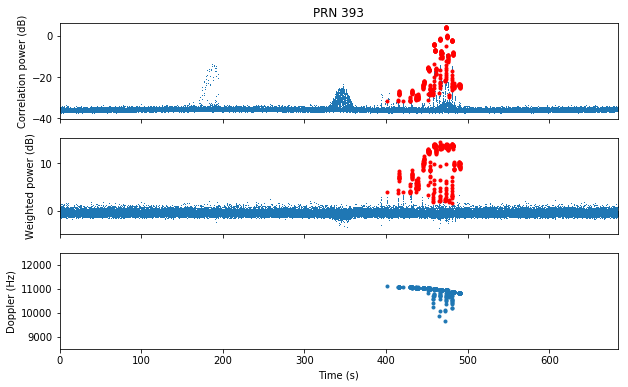

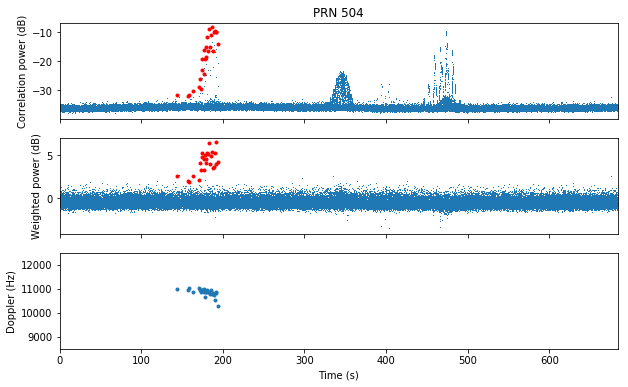

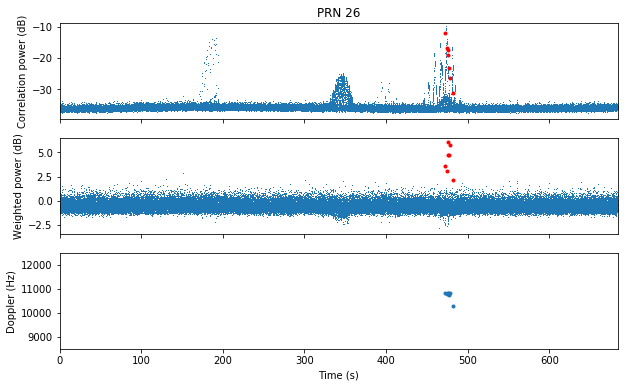

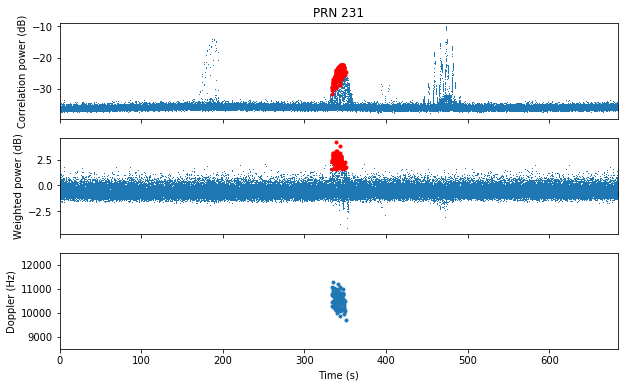

In [18]:
for b in accepted:
    magnitude_threshold_dB = -32
    detected = (best_prn == b) & (20*np.log10(data[:,b,0]) >= magnitude_threshold_dB) &\
        (data[:,b,0] >= 1.2*crosscorrelation_threshold)
    if np.any(detected):
        fig, axs = plt.subplots(3, sharex = True, figsize = (10,6), facecolor = 'w')
        axs[0].plot(time, 20*np.log10(data[:,b,0]), ',')
        axs[0].plot(time[detected], 20*np.log10(data[detected,b,0]), '.', color = 'red')
        axs[1].plot(time, 20*np.log10(data[:,b,0]/crosscorrelation_threshold), ',')
        axs[1].plot(time[detected], 20*np.log10(data[detected,b,0]/crosscorrelation_threshold[detected]),\
                    '.', color = 'red')
        for ax in axs:
            ax.set_xlim([time[0],time[-1]])
        axs[2].plot(time[detected], data[detected,b,1], '.')
        axs[2].set_ylim([centre_doppler-max_doppler, centre_doppler+max_doppler])
        axs[0].set_title(f'PRN {b}')
        axs[0].set_ylabel('Correlation power (dB)')
        axs[1].set_ylabel('Weighted power (dB)')
        axs[2].set_ylabel('Doppler (Hz)')
        axs[2].set_xlabel('Time (s)');

PRNs are allocated in pairs to each Sprite. The two PRNs are used as different symbols to transmit data. The only Sprite detected to be transmitting data is Sprite 392-393. Below we show one of the data transmissions in the recording.

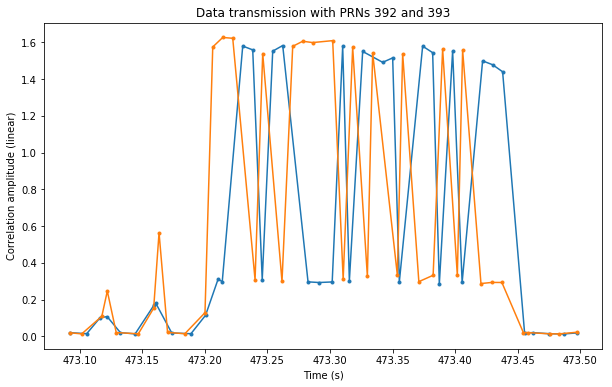

In [19]:
sel = np.arange(46200, 46240)
plt.figure(figsize = (10,6), facecolor='w')
plt.plot((sel*N_FFT//2 +  data[sel,392,2])/fs, data[sel,392,0], '.-')
plt.plot((sel*N_FFT//2 + data[sel,393,2])/fs, data[sel,393,0], '.-')
plt.title('Data transmission with PRNs 392 and 393')
plt.xlabel('Time (s)')
plt.ylabel('Correlation amplitude (linear)');